In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hasan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url='https://drive.google.com/file/d/1WWLeRt4y6bYbN7VoFBkd8yuC6eThnVn8/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df


C:\Users\hasan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0      -122.380503  47.675282         1  352527     353987  EC56520   
1      -122.314169  47.667500         2    1305       1305  3502004   
2      -122.393987  47.539356         3  353327     354787  3901923   
3      -122.322471  47.592171         4  353508     354968  3896163   
4      -122.359508  47.703026         5  353136     354596  EC55754   
...            ...        ...       ...     ...        ...      ...   
236806 -122.339790  47.517905    236807  351938     353398  3906217   
236807 -122.346731  47.523727    236808  351450     352910  EC46515   
236808 -122.284101  47.556450    236809  350911     352371  EC12289   
236809 -122.376777  47.682308    236810  349784     351264  3894090   
236810 -122.387372  47.530541    236811  349754     351234  3899754   

           STATUS ADDRTYPE  INTKEY  \
0       Unmatched    Block     NaN   
1         Matched    Block     NaN   
2       Unmatched    Block     NaN   
3       Unmatched    Block     NaN   
4         Matched    Block     NaN   
...           ...      ...     ...   
236806  Unmatched    Block     NaN   
236807  Unmatched    Block     NaN   
236808    Matched    Block     NaN   
236809    Matched    Block     NaN   
236810    Matched    Block     NaN   

                                                 LOCATION  ... ROADCOND  \
0          NW 64TH ST BETWEEN 17TH AVE NW AND 20TH AVE NW  ...      NaN   
1       BROOKLYN AVE NE BETWEEN NE 52ND ST AND NE 55TH ST  ...      Dry   
2       LINCOLN PARK WAY SW BETWEEN MURRAY AVE SW AND ...  ...      NaN   
3       AIRPORT NB WAY S BETWEEN S ROYAL BROUGHAM WAY ...  ...      NaN   
4         HOLMAN RD NW BETWEEN 3RD AVE NW AND NW 103RD ST  ...      Wet   
...                                                   ...  ...      ...   
236806  OLSON PL SW BETWEEN SW CAMBRIDGE PL AND SW ROX...  ...      NaN   
236807  9TH AVE SW BETWEEN SW TRENTON ST AND SW HENDER...  ...      NaN   
236808  RAINIER AVE S BETWEEN S HUDSON ST AND 39TH N A...  ...      Dry   
236809      15TH AVE NW BETWEEN NW 73RD ST AND NW 75TH ST  ...      Dry   
236810  CALIFORNIA AVE SW BETWEEN SW ELMGROVE ST AND S...  ...      Wet   

                      LIGHTCOND  PEDROWNOTGRNT SDOTCOLNUM SPEEDING  \
0                           NaN            NaN        NaN      NaN   
1                      Daylight            NaN        NaN      NaN   
2                           NaN            NaN        NaN      NaN   
3                           NaN            NaN        NaN      NaN   
4                         Other            NaN        NaN      NaN   
...                         ...            ...        ...      ...   
236806                      NaN            NaN        NaN      NaN   
236807                      NaN            NaN        NaN      NaN   
236808                 Daylight            NaN        NaN      NaN   
236809  Dark - Street Lights On            NaN        NaN      NaN   
236810                 Daylight            NaN        NaN      NaN   

        ST_COLCODE                                         ST_COLDESC  \
0                                                                 NaN   
1               28  From opposite direction - one left turn - one ...   
2                                                                 NaN   
3                                                                 NaN   
4               14  From same direction - both going straight - on...   
...            ...                                                ...   
236806                                                            NaN   
236807                                                            NaN   
236808          12  From same direction - both going straight - on...   
236809          32                             One parked--one moving   
236810          50                                       Fixed object   

        SEGLANEKEY  CROSSWALKKEY  HITPARKEDCAR  
0                0             0       

#### Identify Missing Values

In [3]:
df.isnull().head()

X      Y  OBJECTID  INCKEY  COLDETKEY  REPORTNO  STATUS  ADDRTYPE  \
0  False  False     False   False      False     False   False     False   
1  False  False     False   False      False     False   False     False   
2  False  False     False   False      False     False   False     False   
3  False  False     False   False      False     False   False     False   
4  False  False     False   False      False     False   False     False   

   INTKEY  LOCATION  ...  ROADCOND  LIGHTCOND  PEDROWNOTGRNT  SDOTCOLNUM  \
0    True     False  ...      True       True           True        True   
1    True     False  ...     False      False           True        True   
2    True     False  ...      True       True           True        True   
3    True     False  ...      True       True           True        True   
4    True     False  ...     False      False           True        True   

   SPEEDING  ST_COLCODE  ST_COLDESC  SEGLANEKEY  CROSSWALKKEY  HITPARKEDCAR  
0      True       False        True       False         False         False  
1      True       False       False       False         False         False  
2      True       False        True       False         False         False  
3      True       False        True       False         False         False  
4      True       False       False       False         False         False  

[5 rows x 40 columns]

In [4]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

X
False    229106
True       7705
Name: X, dtype: int64
-----------------------------------
Y
False    229106
True       7705
Name: Y, dtype: int64
-----------------------------------
OBJECTID
False    236811
Name: OBJECTID, dtype: int64
-----------------------------------
INCKEY
False    236811
Name: INCKEY, dtype: int64
-----------------------------------
COLDETKEY
False    236811
Name: COLDETKEY, dtype: int64
-----------------------------------
REPORTNO
False    236811
Name: REPORTNO, dtype: int64
-----------------------------------
STATUS
False    236811
Name: STATUS, dtype: int64
-----------------------------------
ADDRTYPE
False    232952
True       3859
Name: ADDRTYPE, dtype: int64
-----------------------------------
INTKEY
True     158841
False     77970
Name: INTKEY, dtype: int64
-----------------------------------
LOCATION
False    232041
True       4770
Name: LOCATION, dtype: int64
-----------------------------------
EXCEPTRSNCODE
True     120403
False    116408
Name: EXCEPT

#### Replacing Missing Values by most frequency

In [5]:
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

Block           157930
Intersection     77970
Alley              911
Name: ADDRTYPE, dtype: int64

In [6]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    122514
At-Intersection                             77759
Mid-Block (but intersection related)        24769
RampDriveway                                11769
Name: JUNCTIONTYPE, dtype: int64

In [7]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()

0    227076
1      9735
Name: UNDERINFL, dtype: int64

In [8]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Snow","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear       152513
RainSnow     37657
Overcast     30493
Unknown      16148
Name: WEATHER, dtype: int64

In [9]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                167230
Wet                 51374
Unknown             15518
IceOilWaterSnow      2689
Name: ROADCOND, dtype: int64

In [10]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           157266
Dark-With-Light     53262
Unknown             13976
DuskDawn             9191
Dark-No-Light        3116
Name: LIGHTCOND, dtype: int64

In [11]:
# column only has Y, so all the other values should be N
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     236811
unique         2
top            N
freq      206198
Name: INATTENTIONIND, dtype: object

In [12]:
# column only has Y, so all the other values should be N
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

count     236811
unique         2
top            N
freq      226163
Name: SPEEDING, dtype: object

In [13]:
df["SEVERITYDESC"].describe()

count                             236811
unique                                 5
top       Property Damage Only Collision
freq                              146469
Name: SEVERITYDESC, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236811 entries, 0 to 236810
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                229106 non-null  float64
 1   Y                229106 non-null  float64
 2   OBJECTID         236811 non-null  int64  
 3   INCKEY           236811 non-null  int64  
 4   COLDETKEY        236811 non-null  int64  
 5   REPORTNO         236811 non-null  object 
 6   STATUS           236811 non-null  object 
 7   ADDRTYPE         236811 non-null  object 
 8   INTKEY           77970 non-null   float64
 9   LOCATION         232041 non-null  object 
 10  EXCEPTRSNCODE    116408 non-null  object 
 11  EXCEPTRSNDESC    12426 non-null   object 
 12  SEVERITYCODE     236811 non-null  int64  
 13  SEVERITYDESC     236811 non-null  object 
 14  COLLISIONTYPE    205381 non-null  object 
 15  PERSONCOUNT      236811 non-null  int64  
 16  PEDCOUNT         236811 non-null  int6

In [15]:
df_map = df[['SEVERITYCODE','ADDRTYPE','X', 'Y']]

# drop rows with NaN in "X" and "Y" column
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

C:\Users\hasan\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(229106, 4)

#### Correct Data Format

Convert data types to proper format

In [16]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE         int64
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL            int64
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [17]:
# Convert to datetime object
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [18]:
df.dtypes

X                              float64
Y                              float64
OBJECTID                         int64
INCKEY                           int64
COLDETKEY                        int64
REPORTNO                        object
STATUS                          object
ADDRTYPE                        object
INTKEY                         float64
LOCATION                        object
EXCEPTRSNCODE                   object
EXCEPTRSNDESC                   object
SEVERITYCODE                     int64
SEVERITYDESC                    object
COLLISIONTYPE                   object
PERSONCOUNT                      int64
PEDCOUNT                         int64
PEDCYLCOUNT                      int64
VEHCOUNT                         int64
INJURIES                         int64
SERIOUSINJURIES                  int64
FATALITIES                       int64
INCDATE            datetime64[ns, UTC]
INCDTTM                 datetime64[ns]
JUNCTIONTYPE                    object
SDOT_COLCODE             

In [19]:
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head(5)

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
0 -122.380503  47.675282         1  352527     353987  EC56520  Unmatched   
1 -122.314169  47.667500         2    1305       1305  3502004    Matched   
2 -122.393987  47.539356         3  353327     354787  3901923  Unmatched   
3 -122.322471  47.592171         4  353508     354968  3896163  Unmatched   
4 -122.359508  47.703026         5  353136     354596  EC55754    Matched   

  ADDRTYPE  INTKEY                                           LOCATION  ...  \
0    Block     NaN     NW 64TH ST BETWEEN 17TH AVE NW AND 20TH AVE NW  ...   
1    Block     NaN  BROOKLYN AVE NE BETWEEN NE 52ND ST AND NE 55TH ST  ...   
2    Block     NaN  LINCOLN PARK WAY SW BETWEEN MURRAY AVE SW AND ...  ...   
3    Block     NaN  AIRPORT NB WAY S BETWEEN S ROYAL BROUGHAM WAY ...  ...   
4    Block     NaN    HOLMAN RD NW BETWEEN 3RD AVE NW AND NW 103RD ST  ...   

  PEDROWNOTGRNT SDOTCOLNUM  SPEEDING ST_COLCODE  \
0           NaN        NaN         N              
1           NaN        NaN         N         28   
2           NaN        NaN         N              
3           NaN        NaN         N              
4           NaN        NaN         N         14   

                                          ST_COLDESC  SEGLANEKEY  \
0                                                NaN           0   
1  From opposite direction - one left turn - one ...           0   
2                                                NaN           0   
3                                                NaN           0   
4  From same direction - both going straight - on...           0   

   CROSSWALKKEY  HITPARKEDCAR  hourofday  dayofweek  
0             0             Y          0          3  
1             0             N          9          2  
2             0             N          0          0  
3             0             N          0          4  
4             0             N         15          3  

[5 rows x 42 columns]

#### Binning

Transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

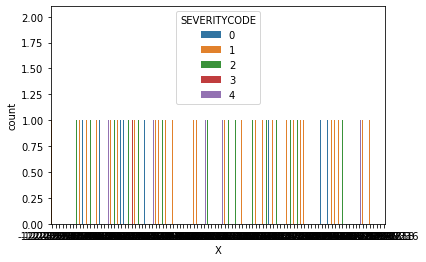

In [20]:
"""
seaborn.countplot(x=None, y=None, hue=None, 
                  data=None, order=None, hue_order=None, 
                  orient=None, color=None, palette=None,
                  saturation=0.75, dodge=True, ax=None, **kwargs)
"""
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [21]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

C:\Users\hasan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


X X-binned
0 -122.380503      Low
1 -122.314169   Medium
2 -122.393987      Low
3 -122.322471   Medium
4 -122.359508   Medium
5 -122.344896   Medium
6 -122.365894      Low
7 -122.381875      Low
8 -122.341890   Medium
9 -122.317225   Medium

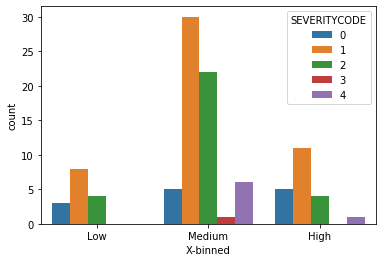

In [22]:
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")

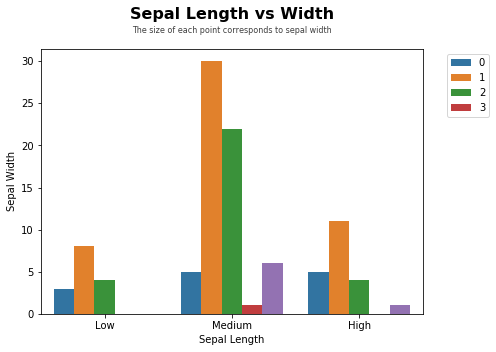

In [23]:
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE", ax=ax)

# make adjustments
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

#### Indicator variables (or dummy variables)

In [24]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

AddType-Block  AddType-Intersection
0              1                     0
1              1                     0
2              1                     0
3              1                     0
4              1                     0

In [25]:
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)

SEVERITYCODE ADDRTYPE           X          Y X-binned  AddType-Block  \
0             1    Block -122.380503  47.675282      Low              1   
1             2    Block -122.314169  47.667500   Medium              1   
2             1    Block -122.393987  47.539356      Low              1   
3             0    Block -122.322471  47.592171   Medium              1   
4             4    Block -122.359508  47.703026   Medium              1   

   AddType-Intersection  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

#### Analysing Feature Patterns using Visualization

In [26]:
df.describe()

X              Y       OBJECTID         INCKEY  \
count  229106.000000  229106.000000  236811.000000  236811.000000   
mean     -122.330724      47.619972  118406.000000  157675.886969   
std         0.030078       0.056314   68361.591636   99211.628248   
min      -122.425315      47.495573       1.000000    1001.000000   
25%      -122.349214      47.576311   59203.500000   75490.500000   
50%      -122.330307      47.615855  118406.000000  134979.000000   
75%      -122.311993      47.664290  177608.500000  230940.500000   
max      -122.238949      47.734142  236811.000000  354590.000000   

           COLDETKEY         INTKEY   SEVERITYCODE    PERSONCOUNT  \
count  236811.000000   77970.000000  236811.000000  236811.000000   
mean   157986.292748   37975.531307       1.211810       2.237899   
std     99680.420639   53448.483646       0.678252       1.451091   
min      1001.000000   23807.000000       0.000000       0.000000   
25%     75490.500000   28664.000000       1.000000       2.000000   
50%    134979.000000   30028.000000       1.000000       2.000000   
75%    231340.500000   34043.750000       2.000000       3.000000   
max    356050.000000  764413.000000       4.000000      93.000000   

            PEDCOUNT    PEDCYLCOUNT  ...       INJURIES  SERIOUSINJURIES  \
count  236811.000000  236811.000000  ...  236811.000000    236811.000000   
mean        0.038170       0.027169  ...       0.372364         0.015726   
std         0.202054       0.164025  ...       0.727052         0.158290   
min         0.000000       0.000000  ...       0.000000         0.000000   
25%         0.000000       0.000000  ...       0.000000         0.000000   
50%         0.000000       0.000000  ...       0.000000         0.000000   
75%         0.000000       0.000000  ...       1.000000         0.000000   
max         6.000000       3.000000  ...      78.000000        41.000000   

          FATALITIES   SDOT_COLCODE      UNDERINFL    SDOTCOLNUM  \
count  236811.000000  236810.000000  236811.000000  1.272050e+05   
mean        0.001824      13.431266       0.041109  7.971063e+06   
std         0.046097       7.318376       0.198542  2.611523e+06   
min         0.000000       0.000000       0.000000  1.007024e+06   
25%         0.000000      11.000000       0.000000  6.007029e+06   
50%         0.000000      12.000000       0.000000  8.033011e+06   
75%         0.000000      14.000000       0.000000  1.018101e+07   
max         5.000000      88.000000       1.000000  1.307202e+07   

          SEGLANEKEY  CROSSWALKKEY      hourofday      dayofweek  
count  236811.000000  2.368110e+05  236811.000000  236811.000000  
mean      252.624701  9.061524e+03      10.027782       2.936823  
std      3179.783178  6.953378e+04       7.521724       1.921914  
min         0.000000  0.000000e+00       0.000000       0.000000  
25%         0.000000  0.000000e+00       0.000000       1.000000  
50%         0.000000  0.000000e+00      11.000000       3.000000  
75%         0.000000  0.000000e+00      16.000000       5.000000  
max    525241.000000  5.239700e+06      23.000000       6.000000  

[8 rows x 21 columns]

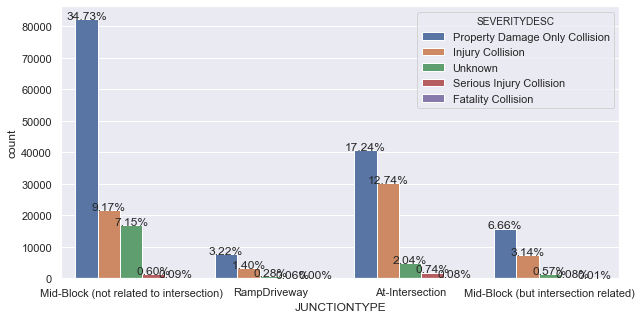

In [27]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


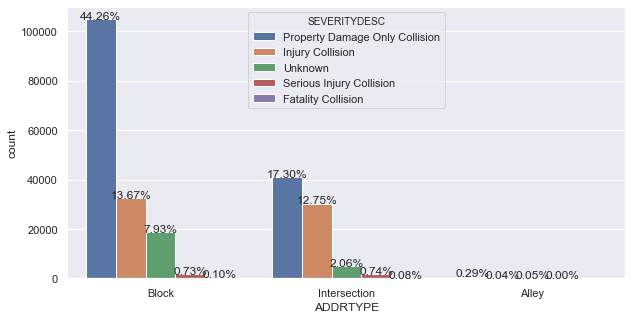

In [28]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

total = float(len(df))  

ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

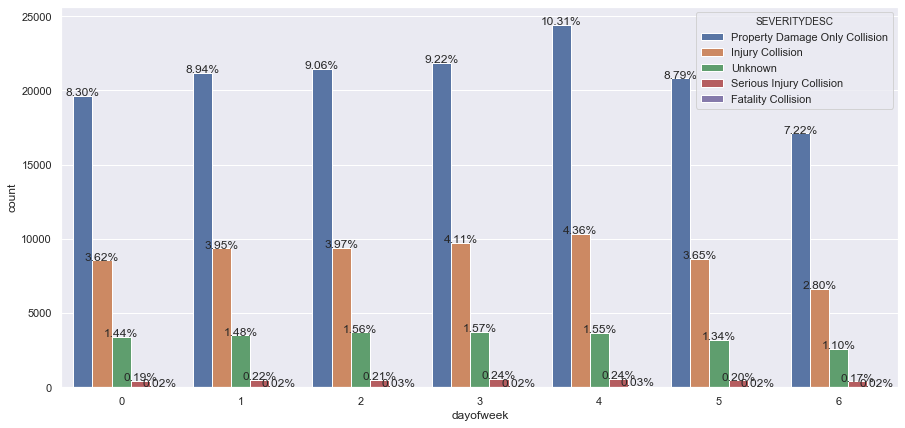

In [29]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")

total = float(len(df))

ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

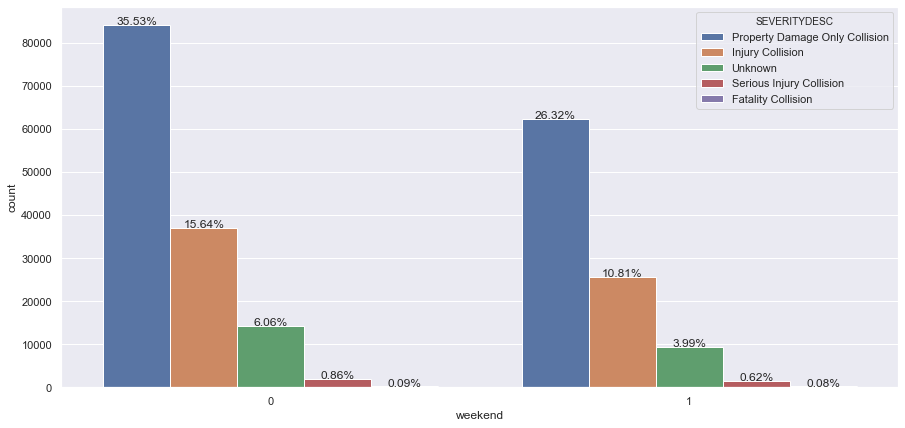

In [30]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")

total = float(len(df))

ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


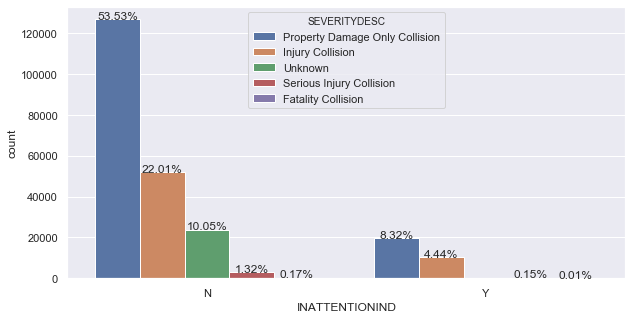

In [31]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

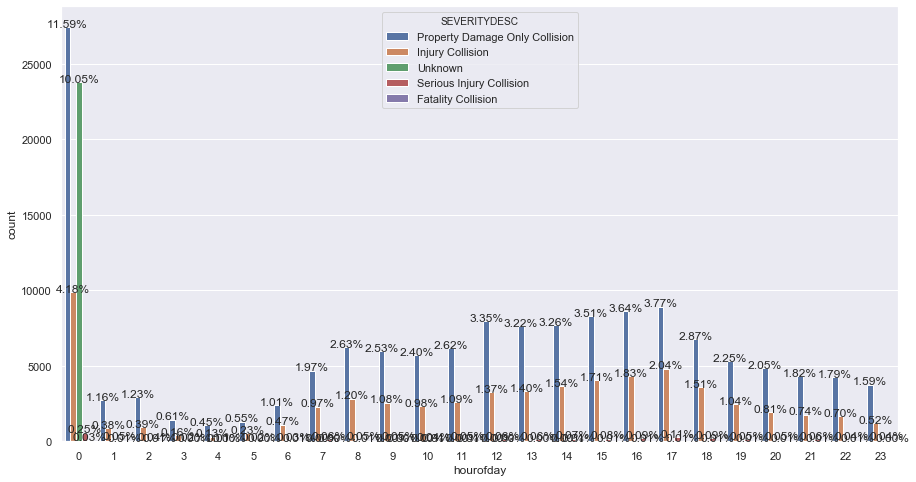

In [32]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


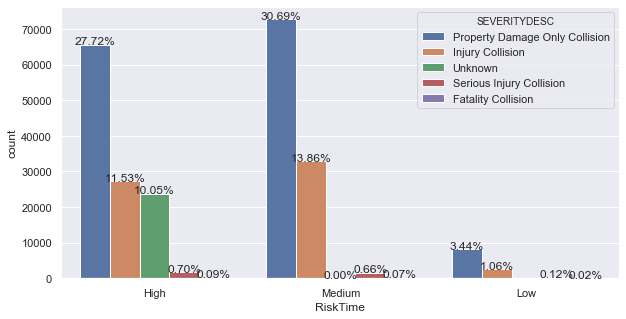

In [33]:
df['RiskTime'] = df['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


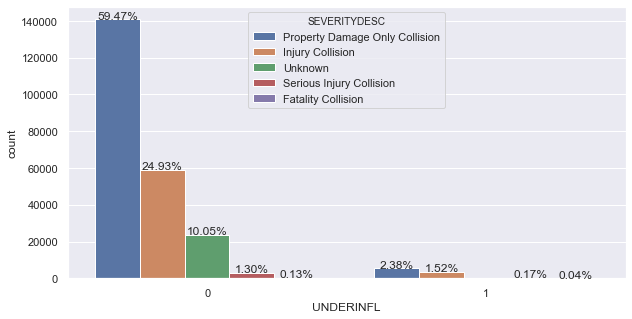

In [34]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values


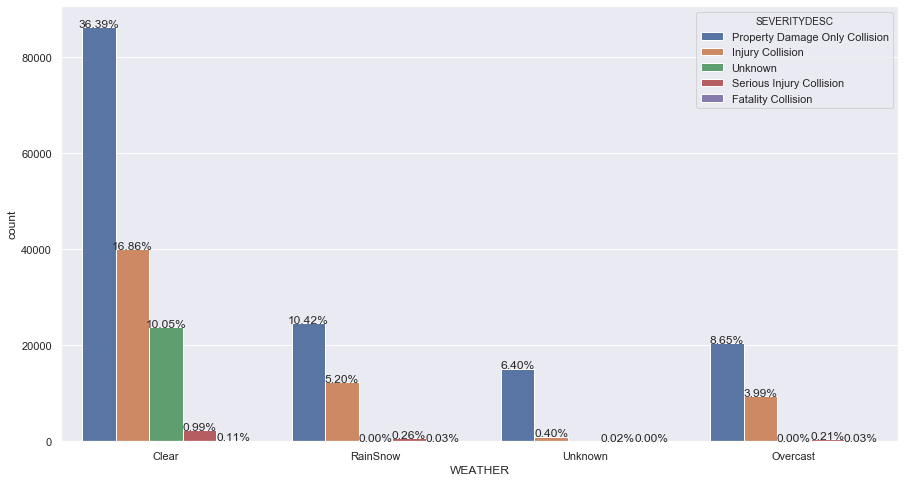

In [35]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


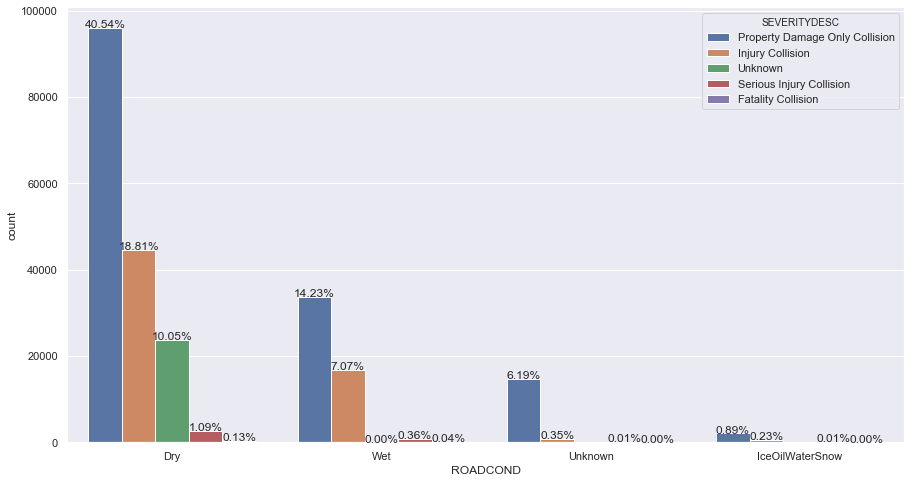

In [36]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


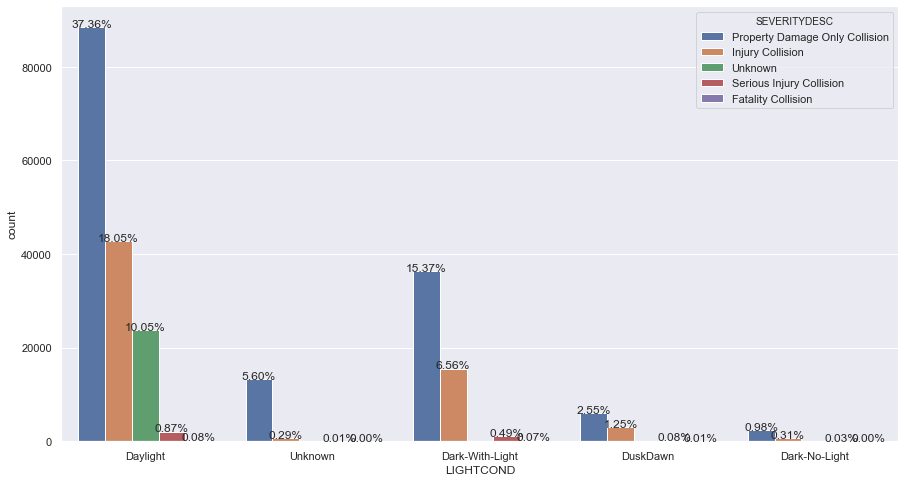

In [37]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

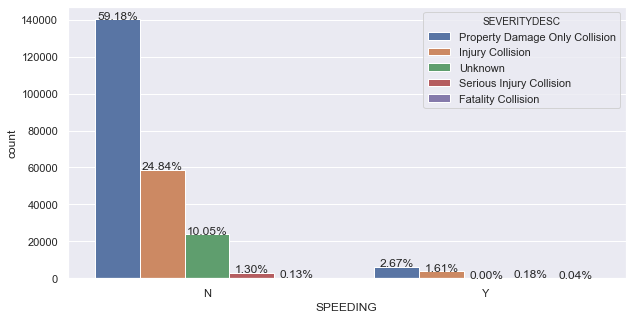

In [38]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

total = float(len(df)) 

ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df) 

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

#### Continuous numerical variables and linear relationship

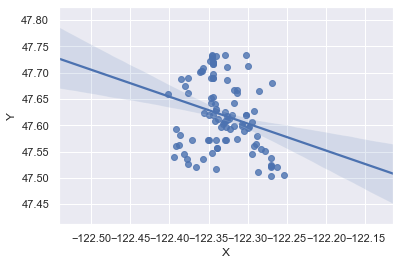

In [39]:
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

#### Categorical variables using boxplot

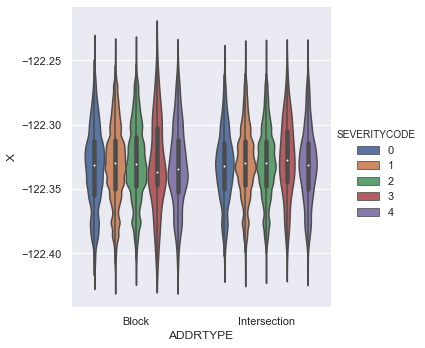

In [40]:
sns.catplot(x="ADDRTYPE", y="X", hue="SEVERITYCODE",data=df_map, kind="violin")
plt.show()

#### Descriptive Statistical Analysis

In [41]:
df.describe(include=['object'])

REPORTNO   STATUS ADDRTYPE  \
count    236811   236811   236811   
unique   236808        2        3   
top     1782439  Matched    Block   
freq          2   205454   157930   

                                                 LOCATION EXCEPTRSNCODE  \
count                                              232041        116408   
unique                                              25687             2   
top     N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...                 
freq                                                  311        103982   

                                            EXCEPTRSNDESC  \
count                                               12426   
unique                                                  1   
top     Not Enough Information, or Insufficient Locati...   
freq                                                12426   

                          SEVERITYDESC COLLISIONTYPE  \
count                           236811        205381   
unique                               5            10   
top     Property Damage Only Collision    Parked Car   
freq                            146469         50466   

                                   JUNCTIONTYPE  \
count                                    236811   
unique                                        4   
top     Mid-Block (not related to intersection)   
freq                                     122514   

                                             SDOT_COLDESC INATTENTIONIND  \
count                                              236810         236811   
unique                                                 41              2   
top     MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...              N   
freq                                                98302         206198   

       WEATHER ROADCOND LIGHTCOND PEDROWNOTGRNT SPEEDING ST_COLCODE  \
count   236811   236811    236811          5477   236811     227400   
unique       4        4         5             1        2         64   
top      Clear      Dry  Daylight             Y        N         32   
freq    152513   167230    157266          5477   226163      46669   

                    ST_COLDESC HITPARKEDCAR RiskTime  
count                   205381       236811   236811  
unique                      63            2        3  
top     One parked--one moving            N     High  
freq                     46669       221262   118590

In [42]:
df['SEVERITYCODE'].value_counts()

1    146469
2     62640
0     23795
4      3500
3       407
Name: SEVERITYCODE, dtype: int64

#### Grouping

In [43]:
df['ADDRTYPE'].unique()

array(['Block', 'Intersection', 'Alley'], dtype=object)

In [44]:
df_gtest = df[['hourofday','ADDRTYPE','SEVERITYCODE']]
grouped_test1 = df_gtest.groupby(['hourofday','ADDRTYPE'],as_index=False).mean()
grouped_test1

hourofday      ADDRTYPE  SEVERITYCODE
0           0         Alley      0.640845
1           0         Block      0.726502
2           0  Intersection      1.021709
3           1         Alley      1.052632
4           1         Block      1.274437
..        ...           ...           ...
67         22         Block      1.259370
68         22  Intersection      1.483004
69         23         Alley      1.107143
70         23         Block      1.239978
71         23  Intersection      1.469153

[72 rows x 3 columns]

In [45]:
grouped_pivot = grouped_test1.pivot(index='ADDRTYPE',columns='hourofday')
grouped_pivot

SEVERITYCODE                                                    \
hourofday              0         1         2         3         4         5    
ADDRTYPE                                                                      
Alley            0.640845  1.052632  1.040000  1.142857  1.000000  1.272727   
Block            0.726502  1.274437  1.259297  1.242340  1.257827  1.276793   
Intersection     1.021709  1.495136  1.471967  1.419580  1.436306  1.527586   

                                                      ...                      \
hourofday           6         7         8         9   ...        14        15   
ADDRTYPE                                              ...                       
Alley         1.250000  1.230769  1.121212  1.068966  ...  1.068182  1.170213   
Block         1.293913  1.283738  1.279224  1.255767  ...  1.288557  1.295047   
Intersection  1.543529  1.542486  1.471376  1.485360  ...  1.495261  1.500990   

                                                                          \
hourofday           16        17        18        19        20        21   
ADDRTYPE                                                                   
Alley         1.270270  1.031250  1.103448  1.193548  1.100000  1.304348   
Block         1.310274  1.320303  1.314901  1.275526  1.250113  1.271026   
Intersection  1.501114  1.543236  1.555161  1.512246  1.492434  1.514806   

                                  
hourofday           22        23  
ADDRTYPE                          
Alley         1.076923  1.107143  
Block         1.259370  1.239978  
Intersection  1.483004  1.469153  

[3 rows x 24 columns]

In [46]:
df_map["geom"] = df_map["Y"].map(str) + "," + df_map["X"].map(str)
df_map.head()

SEVERITYCODE ADDRTYPE           X          Y X-binned  AddType-Block  \
0             1    Block -122.380503  47.675282      Low              1   
1             2    Block -122.314169  47.667500   Medium              1   
2             1    Block -122.393987  47.539356      Low              1   
3             0    Block -122.322471  47.592171   Medium              1   
4             4    Block -122.359508  47.703026   Medium              1   

   AddType-Intersection                      geom  
0                     0  47.67528176,-122.3805027  
1                     0  47.66749967,-122.3141689  
2                     0  47.53935589,-122.3939872  
3                     0  47.59217122,-122.3224714  
4                     0  47.70302582,-122.3595077

In [47]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px

# using X Y data to search for a complete address
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

injury_map = folium.Map(location=[47.61536892, -122.3302243], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

data_heatmap = df_map[df_map['SEVERITYCODE']==2]
data_heatmap = df_map[['Y','X']]
data_heatmap = df_map.dropna(axis=0, subset=['Y','X'])
data_heatmap = [[row['Y'],row['X']] for index, row in data_heatmap.head(10000).iterrows()] 

HeatMap(data_heatmap, radius=10).add_to(injury_map)

injury_map

In [49]:
import folium
from folium import plugins
import webbrowser

# shows the injury record, not property collision
df_map_injury = df_map[df_map['SEVERITYCODE']==2]

# reduced df by selecting every 50th record
reduced_df = df_map_injury.iloc [0::20, 0:]

seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

incidents = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

seattle_map
#seattle_map.save("seattlemap.html")
#webbrowser.open("seattlemap.html")

#### Model Pre-Processing

In [50]:
# converting these features to numerical values
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:5]

array([['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'High', 0],
       ['Block', 'RampDriveway', 'N', 0, 'Clear', 'Dry', 'Daylight', 'N',
        'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'High', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'High', 1],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'RainSnow', 'Wet', 'Unknown', 'N', 'Medium', 0]], dtype=object)

In [51]:
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [52]:
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['ADDRTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'RiskTime']

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

C:\Users\hasan\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


ADDRTYPE  JUNCTIONTYPE  INATTENTIONIND  WEATHER  ROADCOND  LIGHTCOND  \
0         1             2               0        0         0          2   
1         1             3               0        0         0          2   
2         1             2               0        0         0          2   
3         1             2               0        0         0          2   
4         1             2               0        2         3          4   
5         1             2               0        0         0          2   
6         2             0               0        0         0          2   
7         2             0               0        0         0          2   
8         1             2               0        0         0          2   
9         1             1               0        0         0          2   

   SPEEDING  RiskTime  
0         0         0  
1         0         2  
2         0         0  
3         0         0  
4         0         2  
5         0         0  
6         0         0  
7         0         0  
8         0         0  
9         0         0

In [54]:
X = Feature.values
X[0:5]

array([[1, 2, 0, 0, 0, 0, 2, 0, 0, 0],
       [1, 3, 0, 0, 0, 0, 2, 0, 2, 0],
       [1, 2, 0, 0, 0, 0, 2, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 2, 3, 4, 0, 2, 0]], dtype=int64)

In [55]:
"""
from sklearn import preprocessing
le_ADDRTYPE = preprocessing.LabelEncoder()

le_ADDRTYPE.fit(['Intersection', 'Block', 'Alley'])
X[:,0] = le_ADDRTYPE.transform(X[:,0]) 

le_JUNCTIONTYPE = preprocessing.LabelEncoder()
X[:,1] = le_JUNCTIONTYPE.fit(['Mid-Block (not related to intersection)', 'RampDriveway',
       'Mid-Block (but intersection related)','At-Intersection']).transform(X[:,1])

le_INATTENTIONIND = preprocessing.LabelEncoder()
X[:,2] = le_INATTENTIONIND.fit(['N', 'Y']).transform(X[:,2]) 

le_UNDERINFL = preprocessing.LabelEncoder()
X[:,3] = le_UNDERINFL.fit(['N', 'Y']).transform(X[:,3]) 

le_WEATHER = preprocessing.LabelEncoder()
X[:,4] = le_WEATHER.fit(['Overcast', 'RainSnow', 'Clear', 'Unknown']).transform(X[:,4]) 

le_ROADCOND = preprocessing.LabelEncoder()
X[:,5] = le_ROADCOND.fit(['Wet', 'Dry', 'Unknown', 'IceOilWaterSnow']).transform(X[:,5]) 

le_LIGHTCOND = preprocessing.LabelEncoder()
X[:,6] = le_LIGHTCOND.fit(['Daylight', 'Dark-With-Light', 'Dark-No-Light', 'Unknown','DuskDawn']).transform(X[:,6]) 

le_SPEEDING = preprocessing.LabelEncoder()
X[:,7] = le_SPEEDING.fit(['N', 'Y']).transform(X[:,7]) 

le_RiskTime = preprocessing.LabelEncoder()
X[:,8] = le_RiskTime.fit(['Medium', 'Low', 'High']).transform(X[:,8]) 

le_weekend = preprocessing.LabelEncoder()
X[:,9] = le_weekend.fit([0, 1]).transform(X[:,9]) 

X[0:5]
"""

"\nfrom sklearn import preprocessing\nle_ADDRTYPE = preprocessing.LabelEncoder()\n\nle_ADDRTYPE.fit(['Intersection', 'Block', 'Alley'])\nX[:,0] = le_ADDRTYPE.transform(X[:,0]) \n\nle_JUNCTIONTYPE = preprocessing.LabelEncoder()\nX[:,1] = le_JUNCTIONTYPE.fit(['Mid-Block (not related to intersection)', 'RampDriveway',\n       'Mid-Block (but intersection related)','At-Intersection']).transform(X[:,1])\n\nle_INATTENTIONIND = preprocessing.LabelEncoder()\nX[:,2] = le_INATTENTIONIND.fit(['N', 'Y']).transform(X[:,2]) \n\nle_UNDERINFL = preprocessing.LabelEncoder()\nX[:,3] = le_UNDERINFL.fit(['N', 'Y']).transform(X[:,3]) \n\nle_WEATHER = preprocessing.LabelEncoder()\nX[:,4] = le_WEATHER.fit(['Overcast', 'RainSnow', 'Clear', 'Unknown']).transform(X[:,4]) \n\nle_ROADCOND = preprocessing.LabelEncoder()\nX[:,5] = le_ROADCOND.fit(['Wet', 'Dry', 'Unknown', 'IceOilWaterSnow']).transform(X[:,5]) \n\nle_LIGHTCOND = preprocessing.LabelEncoder()\nX[:,6] = le_LIGHTCOND.fit(['Daylight', 'Dark-With-Light', 

In [56]:
"""
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categories = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

# apply OneHotEncoder on categorical feature columns
Feature_ohe = ohe.fit_transform(Feature[categorical_cols]) # It returns an numpy array
Feature_ohe.head(5)
"""

'\n# import OneHotEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n# instantiate OneHotEncoder\nohe = OneHotEncoder(categories = categorical_feature_mask, sparse=False ) \n# categorical_features = boolean mask for categorical columns\n# sparse = False output an array not sparse matrix\n\n# apply OneHotEncoder on categorical feature columns\nFeature_ohe = ohe.fit_transform(Feature[categorical_cols]) # It returns an numpy array\nFeature_ohe.head(5)\n'

In [57]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature.head(5)

(236811, 10)
----After Dummy Fuction------
(236811, 10)


ADDRTYPE  JUNCTIONTYPE  INATTENTIONIND  UNDERINFL  WEATHER  ROADCOND  \
0         1             2               0          0        0         0   
1         1             3               0          0        0         0   
2         1             2               0          0        0         0   
3         1             2               0          0        0         0   
4         1             2               0          0        2         3   

   LIGHTCOND  SPEEDING  RiskTime  weekend  
0          2         0         0        0  
1          2         0         2        0  
2          2         0         0        0  
3          2         0         0        1  
4          4         0         2        0

In [58]:
X = dummy_Feature.values
X

array([[1, 2, 0, ..., 0, 0, 0],
       [1, 3, 0, ..., 0, 2, 0],
       [1, 2, 0, ..., 0, 0, 0],
       ...,
       [1, 2, 0, ..., 0, 2, 0],
       [1, 2, 0, ..., 0, 1, 0],
       [1, 2, 0, ..., 0, 2, 1]], dtype=int64)

In [59]:
"""
# merge data frame "df" and "dummy_variable_1" 
Feature = pd.concat([Feature["UNDERINFL","weekend"], dummy_variables], axis=1)
df_map.head(5)
"""

'\n# merge data frame "df" and "dummy_variable_1" \nFeature = pd.concat([Feature["UNDERINFL","weekend"], dummy_variables], axis=1)\ndf_map.head(5)\n'

#### Model

In [60]:
from sklearn.model_selection import train_test_split
y = df["SEVERITYCODE"]
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142086, 10) (142086,)
Test set: (94725, 10) (94725,)


In [61]:
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE (random_state=0)
X_train, y_train = os.fit_resample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (438625, 10) (438625,)


In [62]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample % before SMOTE--------------
1    0.617408
2    0.264973
0    0.100946
4    0.014885
3    0.001788
Name: SEVERITYCODE, dtype: float64
----------Sample % After SMOTE --------------
1    0.2
0    0.2
4    0.2
2    0.2
3    0.2
Name: SEVERITYCODE, dtype: float64


#### Decision Tree

The best tree_depth:  27
The best accuracy :  0.5231917951741644


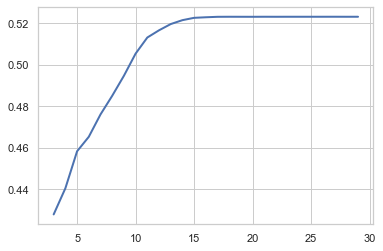

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV

tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy : ",tree_grid_results.best_score_)

In [64]:
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [65]:
import sklearn.metrics as metrics
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree, average= 'weighted')))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

loanTree Jaccard index: 0.35
loanTree F1-score     : 0.50


[[87712    11     0     1     1]
 [10950 33480 17991 13899 11405]
 [10796 16304 28741 19095 12789]
 [11265  9911  5094 56094  5361]
 [12301 12047 12822 24731 25824]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     87725
           1       0.47      0.38      0.42     87725
           2       0.44      0.33      0.38     87725
           3       0.49      0.64      0.56     87725
           4       0.47      0.29      0.36     87725

    accuracy                           0.53    438625
   macro avg       0.51      0.53      0.50    438625
weighted avg       0.51      0.53      0.50    438625



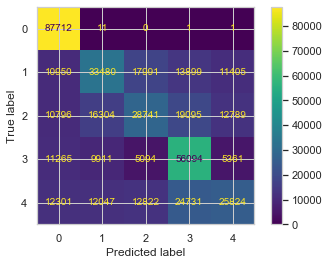

In [66]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()  

In [67]:
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

[[ 9447     2     2     1     0]
 [ 7265 21826 12478  9372  7803]
 [ 3163  5309  7524  5272  3723]
 [   14    31    35    43    30]
 [  177   255   338   371   244]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64      9452
           1       0.80      0.37      0.51     58744
           2       0.37      0.30      0.33     24991
           3       0.00      0.28      0.01       153
           4       0.02      0.18      0.04      1385

    accuracy                           0.41     94725
   macro avg       0.33      0.43      0.30     94725
weighted avg       0.64      0.41      0.47     94725



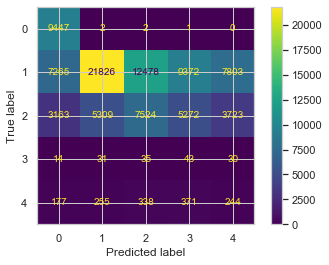

In [68]:
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show() 

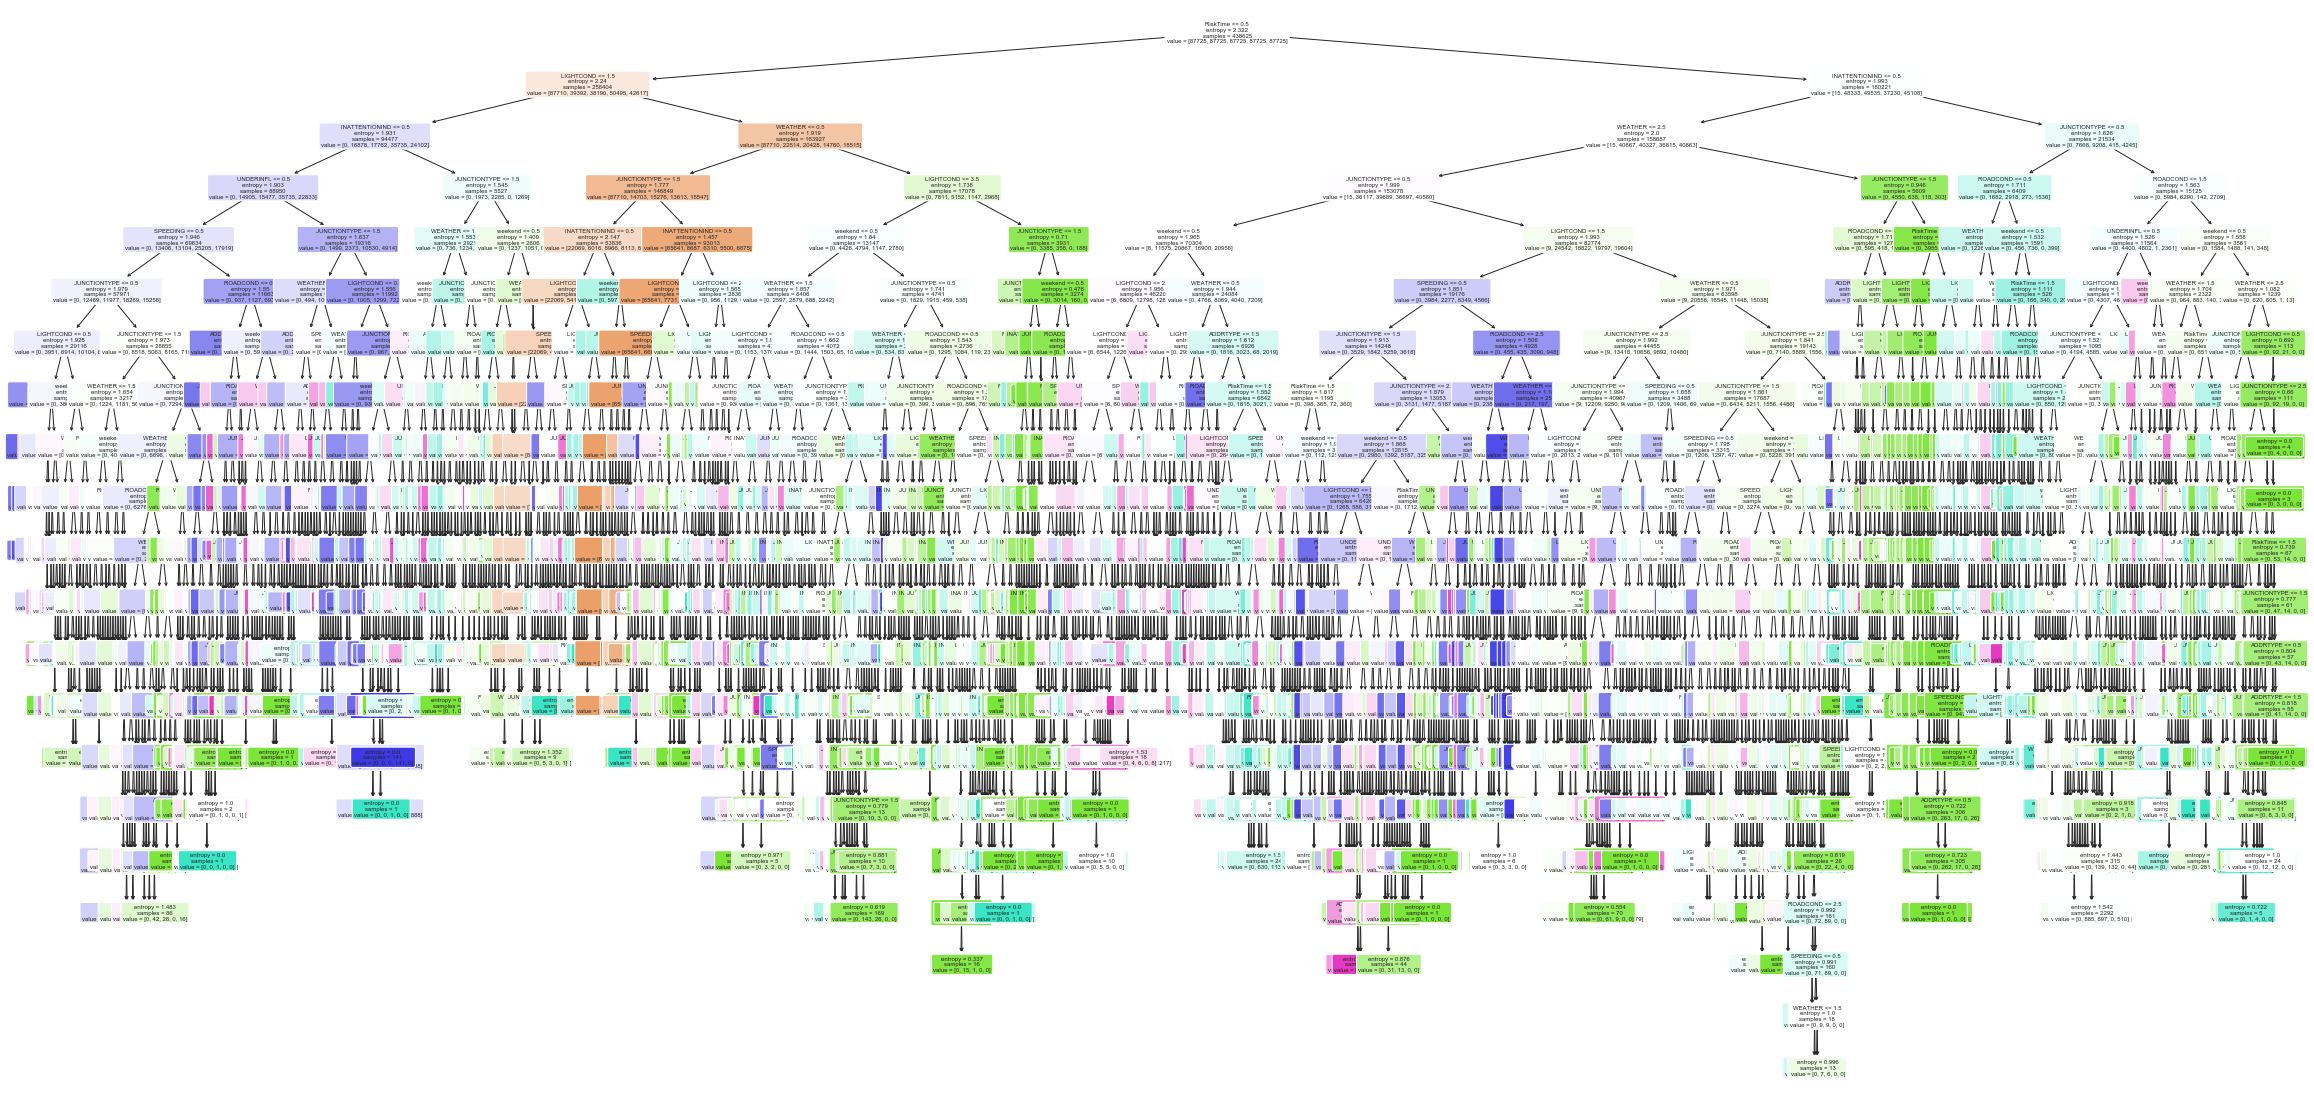

In [69]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
from six import StringIO

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]

plt.figure(figsize=(40,20)) 
tree.plot_tree(carTree, feature_names = X.columns, filled=True, fontsize=6, rounded = True)
plt.show()

#### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} 
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

C:\Users\hasan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hasan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hasan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hasan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\hasan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this trai

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [71]:
print("The best parameter was: ",LR_grid.best_params_) 
print("The best accuracy was : ",LR_grid.best_score_)

The best parameter was:  {'C': 1.0, 'penalty': 'l2'}
The best accuracy was :  0.45921230839258326


In [72]:
# Using the best parameter to model
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X_train,y_train)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [73]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR, average='weighted')))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

LR Jaccard index: 0.28
LR F1-score     : 0.41
LR Log Loss     : 1.26


[[87710     9     1     0     5]
 [16078 37457 15643 12854  5693]
 [13918 24211 23696 15566 10334]
 [15429 14807  7685 37547 12257]
 [16456 19319 16641 24519 10790]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74     87725
           1       0.39      0.43      0.41     87725
           2       0.37      0.27      0.31     87725
           3       0.41      0.43      0.42     87725
           4       0.28      0.12      0.17     87725

    accuracy                           0.45    438625
   macro avg       0.41      0.45      0.41    438625
weighted avg       0.41      0.45      0.41    438625



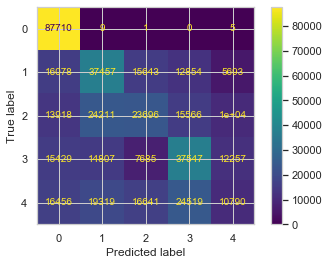

In [74]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()  

[[ 9448     1     1     1     1]
 [10727 25086 10509  8661  3761]
 [ 4042  6874  6813  4417  2845]
 [   20    37    18    65    13]
 [  244   303   266   400   172]]
              precision    recall  f1-score   support

           0       0.39      1.00      0.56      9452
           1       0.78      0.43      0.55     58744
           2       0.39      0.27      0.32     24991
           3       0.00      0.42      0.01       153
           4       0.03      0.12      0.04      1385

    accuracy                           0.44     94725
   macro avg       0.32      0.45      0.30     94725
weighted avg       0.62      0.44      0.48     94725



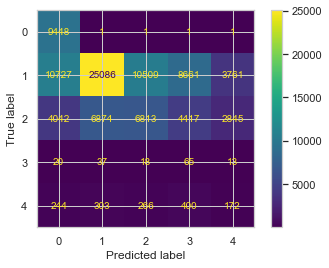

In [75]:
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()  

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
k_range = list(range(1, 10))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [ ]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

In [ ]:
print(scores.mean())

In [ ]:
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())